In [1]:
import base64
import datetime
import time
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from numpy import median
import matplotlib.dates as mdates

np.random.seed(1337)
%matplotlib inline
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 12, 8
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
d = pd.read_csv('tmp/clean_sample_100000_classif_ind_cco_fin_ult1.csv')
d = d.iloc[np.random.permutation(len(d))]
del d['customer_id']
l = d.target.copy()
del d['target']

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cols_to_encode = []
for c in d.columns:
    if d[c].dtype == object:
        cols_to_encode.append(c)

In [5]:
d = pd.get_dummies(d, columns=cols_to_encode)

In [ ]:
# m = XGBClassifier(n_estimators=200, max_depth=8)
# m.fit(tr.fillna(0), trl)
# p = m.predict(te.fillna(0))
# print roc_auc_score(tel, p)
# cmx = pd.DataFrame(confusion_matrix(tel, p))
# cmx.index.name='actual'
# cmx.columns.name='predicted'
# print cmx

In [7]:
lim_train = len(d)/4
tr = d[:lim_train]
trl = l[:lim_train]

print trl.value_counts()

param_grid = {
    'max_depth': [3, 9],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [10, 100],
    'gamma': [0, 0.01]
}

xgb = XGBClassifier()
m = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=2)
m.fit(tr, trl)
print m.best_score_
print m.best_params_

0    23602
1     1082
Name: target, dtype: int64
0    70954
1     3099
Name: target, dtype: int64
0.981769567331
{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 9, 'gamma': 0.01}


In [8]:
lim_train = len(d)/4
tr = d[:lim_train]
trl = l[:lim_train]

print trl.value_counts()

param_grid = {
    'max_depth': [9, 15],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 300],
    'gamma': [0.01, 0.02]
}

xgb = XGBClassifier()
m = GridSearchCV(
        estimator=xgb,
        param_grid=param_grid,
        cv=2)
m.fit(tr, trl)
print m.best_score_
print m.best_params_

0    23602
1     1082
Name: target, dtype: int64
0    70954
1     3099
Name: target, dtype: int64
0.981769567331
{'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 9, 'gamma': 0.01}


In [12]:
lim_train = len(d)/4
tr = d[:lim_train]
trl = l[:lim_train]
te = d[lim_train:]
tel = l[lim_train:]

print trl.value_counts()
print tel.value_counts()

param_grid = {
    'n_neighbors': [3, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'n_jobs': [3]
}

knn = KNeighborsClassifier()
m = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        cv=2)
m.fit(tr.fillna(0), trl)
print m.best_score_
print m.best_params_

0    23602
1     1082
Name: target, dtype: int64
0    70954
1     3099
Name: target, dtype: int64
0.961148922379
{'n_neighbors': 7, 'n_jobs': 3, 'weights': 'uniform', 'p': 1}


In [14]:
lim_train = len(d)/4
tr = d[:lim_train]
trl = l[:lim_train]

print trl.value_counts()

param_grid = {
    'n_neighbors': [7, 15, 31],
    'weights': ['uniform'],
    'p': [1],
    'n_jobs': [3]
}

knn = KNeighborsClassifier()
m = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        cv=2)
m.fit(tr.fillna(0), trl)
print m.best_score_
print m.best_params_

0    23602
1     1082
Name: target, dtype: int64
0    70954
1     3099
Name: target, dtype: int64
0.96179711554
{'n_neighbors': 15, 'n_jobs': 3, 'weights': 'uniform', 'p': 1}


In [49]:
files1 = '''tmp/clean_sample_10000_classif2_ind_ahor_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_aval_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_cco_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_cder_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_cno_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_ctju_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_ctma_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_ctop_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_ctpp_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_deco_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_dela_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_deme_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_ecue_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_fond_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_hip_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_nom_pens_ult1.csv
tmp/clean_sample_10000_classif2_ind_nomina_ult1.csv
tmp/clean_sample_10000_classif2_ind_plan_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_pres_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_reca_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_recibo_ult1.csv
tmp/clean_sample_10000_classif2_ind_tjcr_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_valo_fin_ult1.csv
tmp/clean_sample_10000_classif2_ind_viv_fin_ult1.csv'''.split('\n')

files2 = '''tmp/clean_sample_30000_classif2_ind_ahor_fin_ult1.csv
tmp/clean_sample_30000_classif2_ind_aval_fin_ult1.csv
tmp/clean_sample_30000_classif2_ind_cco_fin_ult1.csv
tmp/clean_sample_30000_classif2_ind_ecue_fin_ult1.csv
tmp/clean_sample_30000_classif2_ind_fond_fin_ult1.csv
tmp/clean_sample_30000_classif2_ind_hip_fin_ult1.csv'''.split('\n')

files3 = '''tmp/clean_sample_100000_classif2_ind_ahor_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_aval_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_cco_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_cder_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_cno_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_ctju_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_ctma_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_ctop_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_ctpp_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_deco_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_dela_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_deme_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_ecue_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_fond_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_hip_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_nom_pens_ult1.csv
tmp/clean_sample_100000_classif2_ind_nomina_ult1.csv
tmp/clean_sample_100000_classif2_ind_plan_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_pres_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_reca_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_recibo_ult1.csv
tmp/clean_sample_100000_classif2_ind_tjcr_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_valo_fin_ult1.csv
tmp/clean_sample_100000_classif2_ind_viv_fin_ult1.csv'''.split('\n')

files4 = '''tmp/clean_sample_100000_classif2_ind_recibo_ult1.csv'''.split('\n')

In [50]:
for f in files3:
    print '=' * 30
    print 'file:', f
    
    d = pd.read_csv(f)
    d = d.iloc[np.random.permutation(len(d))]
    del d['customer_id']
    l = d.target.copy()
    del d['target']
    
    cols_to_encode = []
    for c in d.columns:
        if d[c].dtype == object:
            cols_to_encode.append(c)
            
    d = pd.get_dummies(d, columns=cols_to_encode)
    
    print 'value_counts:'
    print l.value_counts()
    
    try:
        lim_train = 3*len(d)/4
        tr = d[:lim_train]
        trl = l[:lim_train]
        te = d[lim_train:]
        tel = l[lim_train:]

        m = XGBClassifier(
                n_estimators=100,
                learning_rate=0.05,
                max_depth=5,
                gamma=0.01,
                scale_pos_weight=50.0)

        m.fit(tr, trl)
        p = m.predict(te)

        print 'roc_auc_score:'
        print roc_auc_score(tel, p)

        cmx = pd.DataFrame(confusion_matrix(tel, p))
        cmx.index.name='actual'
        cmx.columns.name='predicted'
        print 'confusion matrix:'
        print cmx
    except:
        print ':('

file: tmp/clean_sample_100000_classif2_ind_ahor_fin_ult1.csv
value_counts:
0    100000
Name: target, dtype: int64
roc_auc_score:
:(
file: tmp/clean_sample_100000_classif2_ind_aval_fin_ult1.csv
value_counts:
0    99999
1        1
Name: target, dtype: int64
roc_auc_score:
0.5
confusion matrix:
predicted      0  1
actual             
0          24999  0
1              1  0
file: tmp/clean_sample_100000_classif2_ind_cco_fin_ult1.csv
value_counts:
0    95752
1     4248
Name: target, dtype: int64
roc_auc_score:
0.940961010029
confusion matrix:
predicted      0     1
actual                
0          21974  1994
1             36   996
file: tmp/clean_sample_100000_classif2_ind_cder_fin_ult1.csv
value_counts:
0    99990
1       10
Name: target, dtype: int64
roc_auc_score:
0.5
confusion matrix:
predicted      0  1
actual             
0          24998  0
1              2  0
file: tmp/clean_sample_100000_classif2_ind_cno_fin_ult1.csv
value_counts:
0    97323
1     2677
Name: target, dtype: int64


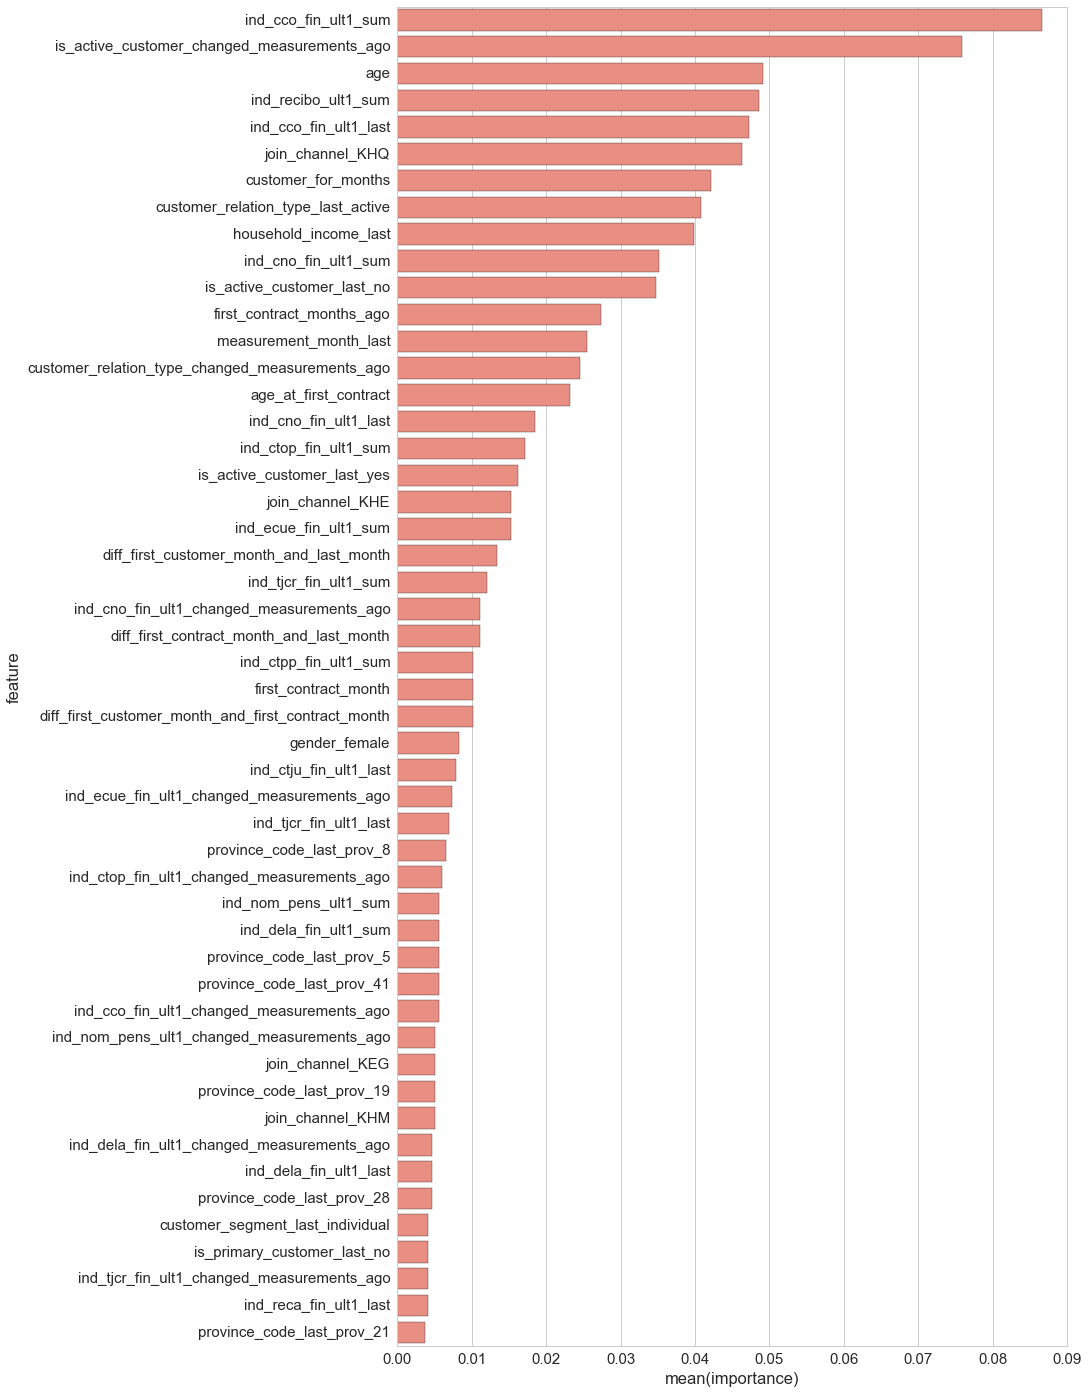

In [47]:
fi = pd.DataFrame({'feature': tr.columns, 'importance': m.feature_importances_})
fi = fi.sort_values(['importance'], ascending=False)
plt.figure(figsize=(12,24))
_ = sns.barplot(
        x='importance',
        y='feature',
        data=fi.head(50),
        color='salmon')